# テンソル分解

目的　テンソル同士の比較、比較することで、そのテンソルの構成している要素を知る。何が原因となって、その特徴量を出しているのか

https://www.jstage.jst.go.jp/article/journalcpij/53/3/53_1320/_pdf/-char/ja

タッカー分解のコアテンソル、因子の扱い全てある

コアテンソルを一旦一緒にするのではなく、それぞれでどの要素が影響しているのかしっかり見極める必要がある、それぞれの特徴行列の数値からどの要素が影響しているのかこの論文を対象に調べる必要がある。

卒論完成目標

1、テンソル分解をする（今のところ、コアテンソルが対角要素となっているCP分解を用いてただテンソル分解をする。

２、テンソル分解後の空間軸のコンポーネントを見て、そこの差をとり、空間軸、４つのコンポーネント、4テンソルのそれぞれの差をとり６個、差分テンソルを作る、これが（８６４、４、６）のテンソルになる（テンソルオールは入れなくていいかも）

３、上のテンソルをタッカー分解することでコアテンソル、空間軸コンポーネントを見ることで差分のつまり、テンソルに差をつけている部分の場所を把握することができる、今のところ順調

４、これを時間軸でもやりたいが、差をとるという事ができるのかという点で最初のテンソル分解をタッカー分解に変えて、時間軸の方も探索するというのもありかもしれない、

終わり、どの場所で差がついているか分かれば、そこから一個前の軸に戻り、また同様に、どの部分が大事かを探索することで、元データに戻り、最終的に、実際の数値の差として知る事ができる

３までの実装が済めば卒論までいけると思うから、次は、４、5でプラスアルファって感じになると思う

# データ処理

## import

In [97]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

## データ処理

In [98]:
#データ読み込み
df_cluster0 = pd.read_csv('./df_cluster0.csv') # 学習データの読み込み
df_cluster1 = pd.read_csv('./df_cluster1.csv') # 検証データの読み込み
df_cluster2 = pd.read_csv('./df_cluster2.csv') # 提出用サンプルデータの読み込み
df_clusterall = pd.read_csv('./df_origin.csv') # 提出用サンプルデータの読み込み

In [99]:
#データ削除
df_cluster0 = df_cluster0[['AirIn','AirOut', 'CPU', 'Water']]
df_cluster1 = df_cluster1[['AirIn','AirOut', 'CPU', 'Water']]
df_cluster2 = df_cluster2[['AirIn','AirOut', 'CPU', 'Water']]
df_clusterall = df_clusterall[['AirIn','AirOut', 'CPU', 'Water']]
"""
df_cluster0 = df_cluster0[['CPU', 'Water']]
df_cluster1 = df_cluster1[['CPU', 'Water']]
df_cluster2 = df_cluster2[[ 'CPU', 'Water']]
df_clusterall = df_clusterall[[ 'CPU', 'Water']]
"""

"\ndf_cluster0 = df_cluster0[['CPU', 'Water']]\ndf_cluster1 = df_cluster1[['CPU', 'Water']]\ndf_cluster2 = df_cluster2[[ 'CPU', 'Water']]\ndf_clusterall = df_clusterall[[ 'CPU', 'Water']]\n"

In [100]:
print(df_cluster0)

        AirIn  AirOut    CPU  Water
0       19.36   22.09  15.96  15.55
1       19.55   21.76  15.89  16.01
2       18.53   22.20  15.92  15.36
3       19.07   21.45  15.84  15.27
4       18.46   22.17  16.07  15.07
...       ...     ...    ...    ...
190939  19.25   24.84  17.78  15.77
190940  19.68   23.48  17.45  15.80
190941  19.40   24.45  17.57  15.63
190942  20.69   24.27  17.45  15.99
190943  19.41   25.45  17.78  15.55

[190944 rows x 4 columns]


In [101]:

df_cluster0_sc = preprocessing.scale(df_cluster0, axis=0)
df_cluster1_sc = preprocessing.scale(df_cluster1, axis=0)
df_cluster2_sc = preprocessing.scale(df_cluster2, axis=0)
df_clusterall_sc = preprocessing.scale(df_clusterall, axis=0)
"""
df_cluster0_sc = df_cluster0.values
df_cluster1_sc = df_cluster1.values
df_cluster2_sc = df_cluster2.values
df_clusterall_sc = df_clusterall.values
"""

'\ndf_cluster0_sc = df_cluster0.values\ndf_cluster1_sc = df_cluster1.values\ndf_cluster2_sc = df_cluster2.values\ndf_clusterall_sc = df_clusterall.values\n'

In [102]:
#テンソル化
"""
tensor_0 = df_cluster0_sc.reshape(-1, 864, 4)
#print(tensor_0[1,0,0])
tensor_1 = df_cluster1_sc.reshape(-1, 864, 4)
#print(tensor_1[1,0,0])
tensor_2 = df_cluster2_sc.reshape(-1, 864, 4)
#print(tensor_2[1,0,0])
tensor_all = df_clusterall_sc.reshape(-1, 864, 4)
#print(tensor_2[1,0,0])
"""
tensor_0 = df_cluster0_sc.reshape(-1, 864, 4)
#print(tensor_0[1,0,0])
tensor_1 = df_cluster1_sc.reshape(-1, 864, 4)
#print(tensor_1[1,0,0])
tensor_2 = df_cluster2_sc.reshape(-1, 864, 4)
#print(tensor_2[1,0,0])
tensor_all = df_clusterall_sc.reshape(-1, 864, 4)
#print(tensor_2[1,0,0])

In [103]:
#axis=0,奥行,axis=1,行、axis=2,列
"""
tensor_0=np.delete(tensor_0,0,axis=1)
print(tensor_0.shape)
"""

'\ntensor_0=np.delete(tensor_0,0,axis=1)\nprint(tensor_0.shape)\n'

# テンソル分解

## import

In [104]:
!pip install -U tensorly

Requirement already up-to-date: tensorly in c:\users\cocon\anaconda3\lib\site-packages (0.7.0)


In [105]:
import tensorly as tl
import numpy as np
from tensorly.decomposition import tucker
from matplotlib import pyplot as plt
from tensorly.base import unfold
from tensorly.tenalg import multi_mode_dot, mode_dot
from tensorly.tucker_tensor import tucker_to_tensor, TuckerTensor, validate_tucker_rank, tucker_normalize
from tensorly.decomposition import non_negative_parafac, non_negative_tucker

## テンソル分解

In [107]:
def non_negative_tucker_core(tensor, rank,mcore, n_iter_max=1000, init='svd', tol=10e-5,
                        random_state=None, verbose=False, return_errors=False,
                        normalize_factors=False):
    """Non-negative Tucker decomposition

        Iterative multiplicative update, see [2]_

    Parameters
    ----------
    tensor : ``ndarray``
    rank : None, int or int list
        size of the core tensor, ``(len(ranks) == tensor.ndim)``
        if int, the same rank is used for all modes
    n_iter_max : int
        maximum number of iteration
    init : {'svd', 'random'}
    random_state : {None, int, np.random.RandomState}
    verbose : int , optional
        level of verbosity
    ranks : None or int list
    size of the core tensor
    normalize_factors : if True, aggregates the core which will contain the norms of the factors.

    Returns
    -------
    core : ndarray
            positive core of the Tucker decomposition
            has shape `ranks`
    factors : ndarray list
            list of factors of the CP decomposition
            element `i` is of shape ``(tensor.shape[i], rank)``

    References
    ----------
    .. [2] Yong-Deok Kim and Seungjin Choi,
       "Non-negative tucker decomposition",
       IEEE Conference on Computer Vision and Pattern Recognition s(CVPR),
       pp 1-8, 2007
    """
    rank = validate_tucker_rank(tl.shape(tensor), rank=rank)

    epsilon = 10e-12

    # Initialisation
    if init == 'svd':
        core, factors = tucker(tensor, rank)
        nn_factors = [tl.abs(f) for f in factors]
        nn_core = tl.abs(core)
    else:
        rng = tl.check_random_state(random_state)
        core = tl.tensor(rng.random_sample(rank) + 0.01, **tl.context(tensor))  # Check this
        factors = [tl.tensor(rng.random_sample(s), **tl.context(tensor)) for s in zip(tl.shape(tensor), rank)]
        nn_factors = [tl.abs(f) for f in factors]
        nn_core = tl.abs(core)

    norm_tensor = tl.norm(tensor, 2)
    rec_errors = []
    nn_core=tl.abs(mcore)#
    for iteration in range(n_iter_max):
        for mode in range(tl.ndim(tensor)):
            B = tucker_to_tensor((nn_core, nn_factors), skip_factor=mode)
            B = tl.transpose(unfold(B, mode))

            numerator = tl.dot(unfold(tensor, mode), B)
            numerator = tl.clip(numerator, a_min=epsilon, a_max=None)
            denominator = tl.dot(nn_factors[mode], tl.dot(tl.transpose(B), B))
            denominator = tl.clip(denominator, a_min=epsilon, a_max=None)
            nn_factors[mode] *= numerator / denominator

        numerator = tucker_to_tensor((tensor, nn_factors), transpose_factors=True)
        numerator = tl.clip(numerator, a_min=epsilon, a_max=None)
        for i, f in enumerate(nn_factors):
            if i:
                denominator = mode_dot(denominator, tl.dot(tl.transpose(f), f), i)
            else:
                denominator = mode_dot(nn_core, tl.dot(tl.transpose(f), f), i)
        denominator = tl.clip(denominator, a_min=epsilon, a_max=None)
        #nn_core *= numerator / denominator

        rec_error = tl.norm(tensor - tucker_to_tensor((nn_core, nn_factors)), 2) / norm_tensor
        rec_errors.append(rec_error)
        if iteration > 1 and verbose:
            print('reconstruction error={}, variation={}.'.format(
                rec_errors[-1], rec_errors[-2] - rec_errors[-1]))

        if iteration > 100 and abs(rec_errors[-2] - rec_errors[-1]) < tol:
            if verbose:
                print('converged in {} iterations.'.format(iteration))
            break
        if normalize_factors:
            nn_core, nn_factors = tucker_normalize((nn_core, nn_factors))
    tensor = TuckerTensor((nn_core, nn_factors))
    if return_errors:
        return tensor, rec_errors
    else:
        print("rec_errors")
        print(rec_errors)
        return tensor


In [108]:
def ntd(tensor,rank_list):
  return non_negative_tucker(tensor, rank_list, tol=1.0e-10, n_iter_max=100)

## プロット

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
def heatfacpltracwiden(t0,t1,t2,t3,m,n):
  plt.figure(figsize=(1*10,1*10))
  a=t0[1][:,m].T.reshape(24,36)
  b=t1[1][:,m].T.reshape(24,36)
  c=t2[1][:,m].T.reshape(24,36)
  d=t3[1][:,m].T.reshape(24,36)
  plt.subplot(n,4,m*4+1)
  sns.heatmap(a,vmin=0, vmax=1)
  plt.subplot(n,4,m*4+2)
  sns.heatmap(b,vmin=0, vmax=1)
  plt.subplot(n,4,m*4+3)
  sns.heatmap(c,vmin=0, vmax=1)
  plt.subplot(n,4,m*4+4)
  sns.heatmap(d,vmin=0, vmax=1)

In [111]:
def heattimeplt(t0,t1,t2,t3):
  plt.figure(figsize=(1*10,1*10))
  plt.subplot(1,4,1)
  sns.heatmap(t0[0][:,:])
  plt.subplot(1,4,2)
  sns.heatmap(t1[0][:,:])
  plt.subplot(1,4,3)
  sns.heatmap(t2[0][:,:])
  plt.subplot(1,4,4)
  sns.heatmap(t3[0][:,:])

特徴ベクトルをひとつめは5以下二つ目は10以下などできないか？

実験で様々な分析が出来るように、棒グラフなどいろいろ入れたい

データフレーム実装

空間軸ヒートマップ〇

時間軸ヒートマップ〇

時間軸線グラフ〇

測定軸ヒートマップと棒グラフ〇

コアテンソルヒートマップもしくは、数値 〇

元データの値を選択からの表示

個別逆テンソル復元をし、元データの特徴を比較

##データフレーム関数

In [112]:
def spaceHeatPlot(b0,b1,b2,b3,rl):
  for num in range(0,rl[1]):
    heatfacpltracwiden(b0,b1,b2,b3,num,rl[1])

In [113]:
def timeHeatPlot(b0,b1,b2,b3,rl):
  heattimeplt(b0,b1,b2,b3)

In [114]:
def timeLinePlot(b0,b1,b2,b3,rl):
  n=rl[0]
  plt.figure(figsize=(1*10,1*10))

  sns.relplot(data=b0[0][:,:], kind='line')
  sns.relplot(data=b1[0][:,:], kind='line')
  sns.relplot(data=b2[0][:,:], kind='line')
  sns.relplot(data=b3[0][:,:], kind='line')

In [115]:
def measureHeatPlot(b0,b1,b2,b3,rl):
  plt.figure(figsize=(1*10,1*10))
  plt.subplot(1,4,1)
  sns.heatmap(b0[2][:,:])
  plt.subplot(1,4,2)
  sns.heatmap(b1[2][:,:])
  plt.subplot(1,4,3)
  sns.heatmap(b2[2][:,:])
  plt.subplot(1,4,4)
  sns.heatmap(b3[2][:,:])

In [116]:
def measureBarPlot(b0,b1,b2,b3,rl):
  plt.figure(figsize=(1*10,1*10))
  plt.subplot(1,4,1)
  sns.barplot(data=b0[2])
  plt.subplot(1,4,2)
  sns.barplot(data=b1[2])
  plt.subplot(1,4,3)
  sns.barplot(data=b2[2])
  plt.subplot(1,4,4)
  sns.barplot(data=b3[2])

In [117]:
def coreHeatMap(a0,a1,a2,a3,rl):
  n=rl[2]
  for m in range(0,rl[2]):
    #heatfacpltracwiden(b0,b1,b2,b3,num,rl[1])
    plt.figure(figsize=(n*10,n*10))
    plt.subplot(n,4,m*4+1)
    sns.heatmap(a0[:,:,m],vmin=0, vmax=1)
    plt.subplot(n,4,m*4+2)
    sns.heatmap(a1[:,:,m],vmin=0, vmax=1)
    plt.subplot(n,4,m*4+3)
    sns.heatmap(a2[:,:,m],vmin=0, vmax=1)
    plt.subplot(n,4,m*4+4)
    sns.heatmap(a3[:,:,m],vmin=0, vmax=1)

In [118]:
def allPlot(a,b,rl):
  plt.subplot(2,3,1)
  sns.heatmap(b[0][:,:])
  plt.subplot(2,3,2)
  sns.heatmap(b[1][:,:])
  plt.subplot(2,3,3)
  sns.heatmap(b[2][:,:])
  for m in range(0,rl[2]):
    plt.subplot(2,3,m+4)
    sns.heatmap(a[:,:,m])

In [119]:
def spaceHeatDif(t0,t1,t2,t3,m,n):
  plt.figure(figsize=(n*10,n*10))
  a=t0[1][:,m].T.reshape(24,36)
  b=t1[1][:,m].T.reshape(24,36)
  c=t2[1][:,m].T.reshape(24,36)
  d=t3[1][:,m].T.reshape(24,36)
  ab=abs(a-b)
  ac=abs(a-c)
  bc=abs(b-c)
  ad=abs(a-d)
  bd=abs(b-d)
  cd=abs(c-d)

  plt.subplot(n,6,m*6+1)
  print("01")
  sns.heatmap(ab,vmin=0, vmax=1)
  plt.subplot(n,6,m*6+2)
  print("02")
  sns.heatmap(ac,vmin=0, vmax=1)
  plt.subplot(n,6,m*6+3)
  print("12")
  sns.heatmap(bc,vmin=0, vmax=1)
  plt.subplot(n,6,m*6+4)
  print("0a")
  sns.heatmap(ad,vmin=0, vmax=1)
  plt.subplot(n,6,m*6+5)
  print("1a")
  sns.heatmap(bd,vmin=0, vmax=1)
  plt.subplot(n,6,m*6+6)
  print("2a")
  sns.heatmap(cd,vmin=0, vmax=1)
  print("誤差")
  print("01")
  print(ab.sum())
  print("02")
  print(ac.sum())
  print("12")
  print(bc.sum())
  print("0a")
  print(ad.sum())
  print("1a")
  print(bd.sum())
  print("2a")
  print(cd.sum()) 

In [120]:
def spaceRowHeatDif(t0,t1,t2,t3):
  plt.figure(figsize=(1*10,1*10))
  a=t0[1][:,:]
  b=t1[1][:,:]
  c=t2[1][:,:]
  d=t3[1][:,:]
  ab=abs(a-b)
  ac=abs(a-c)
  bc=abs(b-c)
  ad=abs(a-d)
  bd=abs(b-d)
  cd=abs(c-d)

  plt.subplot(1,6,1)
  print("01")
  sns.heatmap(ab,vmin=0, vmax=1)
  plt.subplot(1,6,2)
  print("02")
  sns.heatmap(ac,vmin=0, vmax=1)
  plt.subplot(1,6,3)
  print("12")
  sns.heatmap(bc,vmin=0, vmax=1)
  plt.subplot(1,6,4)
  print("0a")
  sns.heatmap(ad,vmin=0, vmax=1)
  plt.subplot(1,6,5)
  print("1a")
  sns.heatmap(bd,vmin=0, vmax=1)
  plt.subplot(1,6,6)
  print("2a")
  sns.heatmap(cd,vmin=0, vmax=1)
  print("誤差")
  print("01")
  print(ab.sum())
  print("02")
  print(ac.sum())
  print("12")
  print(bc.sum())
  print("0a")
  print(ad.sum())
  print("1a")
  print(bd.sum())
  print("2a")
  print(cd.sum()) 

In [121]:
def plotFream(t0,t1,t2,t3,rl):
  tt0,u0=ntd(t0,rl)
  a0,b0=non_negative_tucker_core(t0,rl,tt0)
  a1,b1=non_negative_tucker_core(t1,rl,tt0)
  a2,b2=non_negative_tucker_core(t2,rl,tt0)
  a3,b3=non_negative_tucker_core(t3,rl,tt0)
    
  #spaceHeatPlot(b0,b1,b2,b3,rl)

  #plt.subplot(2,1,1)
  plt.subplot2grid((2, 2), (0, 0), colspan=2)
  spaceHeatPlot(b0,b1,b2,b3,rl)
  plt.title("spaceHeatPlot")
  #plt.subplot(2,1,2)
  plt.subplot2grid((2, 2), (1, 0), colspan=2)
  timeHeatPlot(b0,b1,b2,b3,rl)
  plt.title("timeHeatPlot")
  """
  timeLinePlot(b0,b1,b2,b3,rl)
  plt.title("timeLinePlot")
  measureHeatPlot(b0,b1,b2,b3,rl)
  plt.title("measureHeatPlot")
  measureBarPlot(b0,b1,b2,b3,rl)  
  plt.title("measureBarPlot")
  coreHeatMap(a0,a1,a2,a3,rl)
  plt.title("coreHeatMap")
  allPlot(a0,b0,rl)
  plt.title("allPlot")
  
  """
  """
  n=rl[1]
  for m in range(0,rl[1]):
    spaceHeatDif(b0,b1,b2,b3,m,n)
  """
  #spaceRowHeatDif(b0,b1,b2,b3)

## 実験

変数の固定　測定値の固定をすることでの、時間軸と空間軸の比較、ラック毎の差を見た後、その差を生み出している原因の特定のための元データを戻って比較

In [122]:
rank_list=[4,4,4]
#rank_list=[10,10,2]

In [123]:
#plotFream(tensor_0,tensor_1,tensor_2,tensor_all,rank_list)

01の820番くらいが差が生まれているからその部分を比較するため、元データの比較と並び替えが必要

In [124]:
#tt0,u0=ntd(tensor_0,rank_list)
tt0=np.zeros((4,4,4))
tt0[0,0,0]=1
tt0[1,1,1]=1
tt0[2,2,2]=1
tt0[3,3,3]=1

a0,b0=non_negative_tucker_core(tensor_0,rank_list,tt0)
a1,b1=non_negative_tucker_core(tensor_1,rank_list,tt0)
a2,b2=non_negative_tucker_core(tensor_2,rank_list,tt0)
a3,b3=non_negative_tucker_core(tensor_all,rank_list,tt0)

rec_errors
[0.849467496482033, 0.8091155932996459, 0.7981031389296822, 0.7921048049986347, 0.7877168852027634, 0.7842515556381822, 0.7816063062370291, 0.7797073704267794, 0.7783357189137314, 0.7773557779512551, 0.7766521996296618, 0.7761419304015952, 0.7757642660554214, 0.7754763265359695, 0.7752421345048659, 0.775040699485946, 0.7748577990043327, 0.7746791118115177, 0.7744794537272951, 0.774231538744684, 0.7739191922180411, 0.7734603902444003, 0.7728865480843405, 0.7723422350683528, 0.7718780943470304, 0.771453778080279, 0.7710521670505383, 0.7706663746560475, 0.7702691781631713, 0.7698733590161645, 0.7695050959754605, 0.7691314801236281, 0.7687456299667519, 0.7683436090295395, 0.7678190097350903, 0.7671989974152137, 0.766656637748565, 0.7661020359498727, 0.76543769666807, 0.7648111898921748, 0.7640697114972527, 0.7633819013321602, 0.7627469328807024, 0.7621930069182785, 0.7616106065695755, 0.7610529120217935, 0.7604417147280378, 0.759867116507816, 0.7594496893431456, 0.75905574615439

In [125]:
def spaceRowHeatDifOut(t0,t1):
  plt.figure(figsize=(1*10,1*10))
  a=t0[1][:,:]
  b=t1[1][:,:]
  ab=abs(a-b)

  print("01")
  sns.heatmap(ab,vmin=0, vmax=1)

  print("誤差")
  print("01")
  print(ab.sum())
  return ab

01
誤差
01
152.07126447564883
01
誤差
01
158.22150025799377
01
誤差
01
131.98830727743183
01
誤差
01
143.51705136085002
01
誤差
01
199.78368399645842
01
誤差
01
138.17800126541653


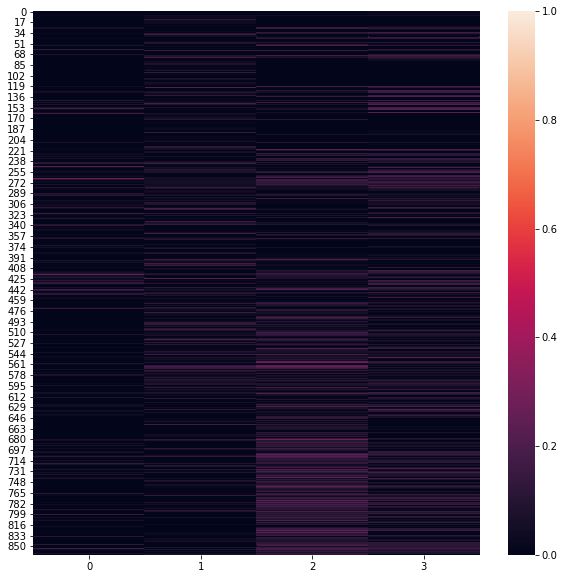

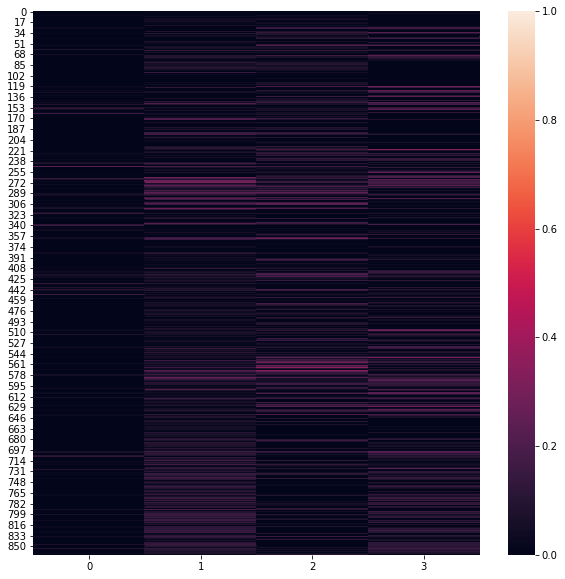

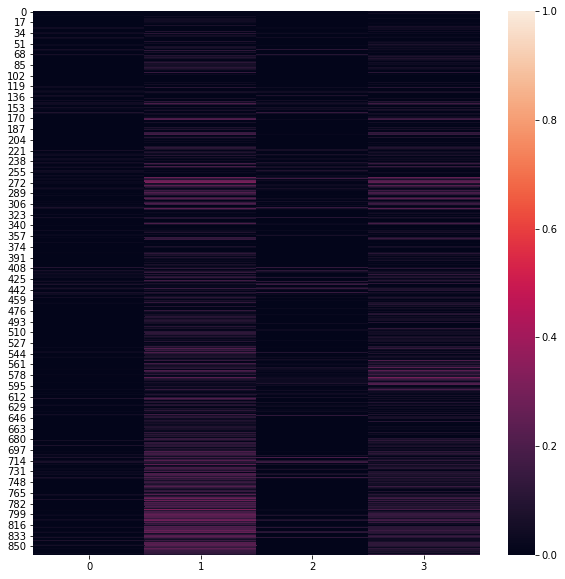

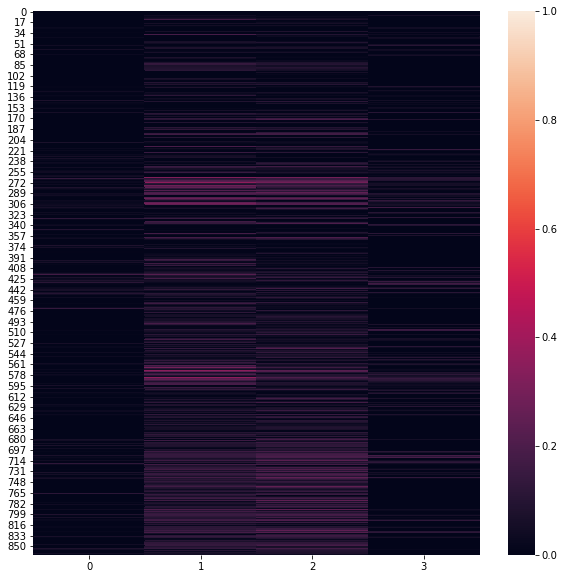

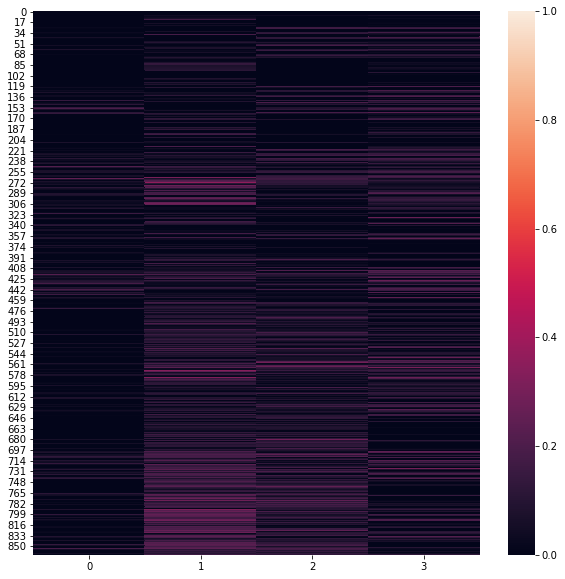

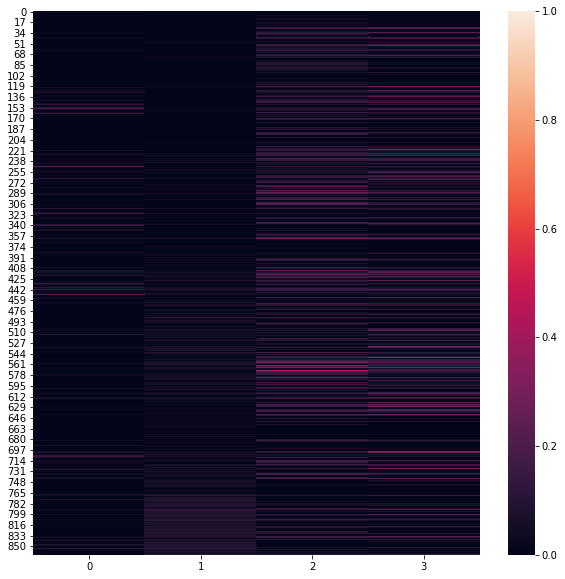

In [126]:
a1=spaceRowHeatDifOut(b0,b1)
a2=spaceRowHeatDifOut(b0,b2)
a3=spaceRowHeatDifOut(b0,b3)
a4=spaceRowHeatDifOut(b1,b2)
a5=spaceRowHeatDifOut(b1,b3)
a6=spaceRowHeatDifOut(b2,b3)

In [127]:
# 二次元配列を3次元方向に結合
diff_array_3d = np.stack([a1,a2,a3,a4,a5,a6], axis=2)
# 形状確認
diff_array_3d.shape

(864, 4, 6)

In [128]:
rank_list=[4,4,4]

In [129]:
cda3,uda3=ntd(diff_array_3d,rank_list)

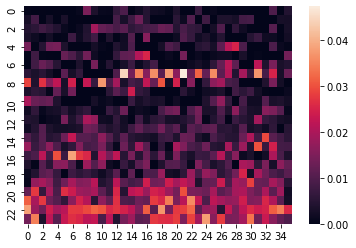

In [130]:
d=uda3[0][:,0].T.reshape(24,36)
#sns.heatmap(d,vmin=0, vmax=1)
sns.heatmap(d)

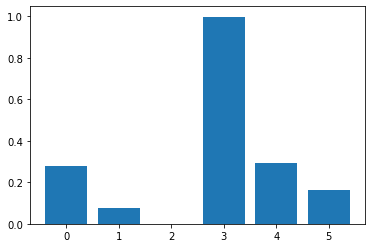

In [131]:
left=range(6)
height1=uda3[2][:,1]
p1 = plt.bar(left, height1, linewidth=2)

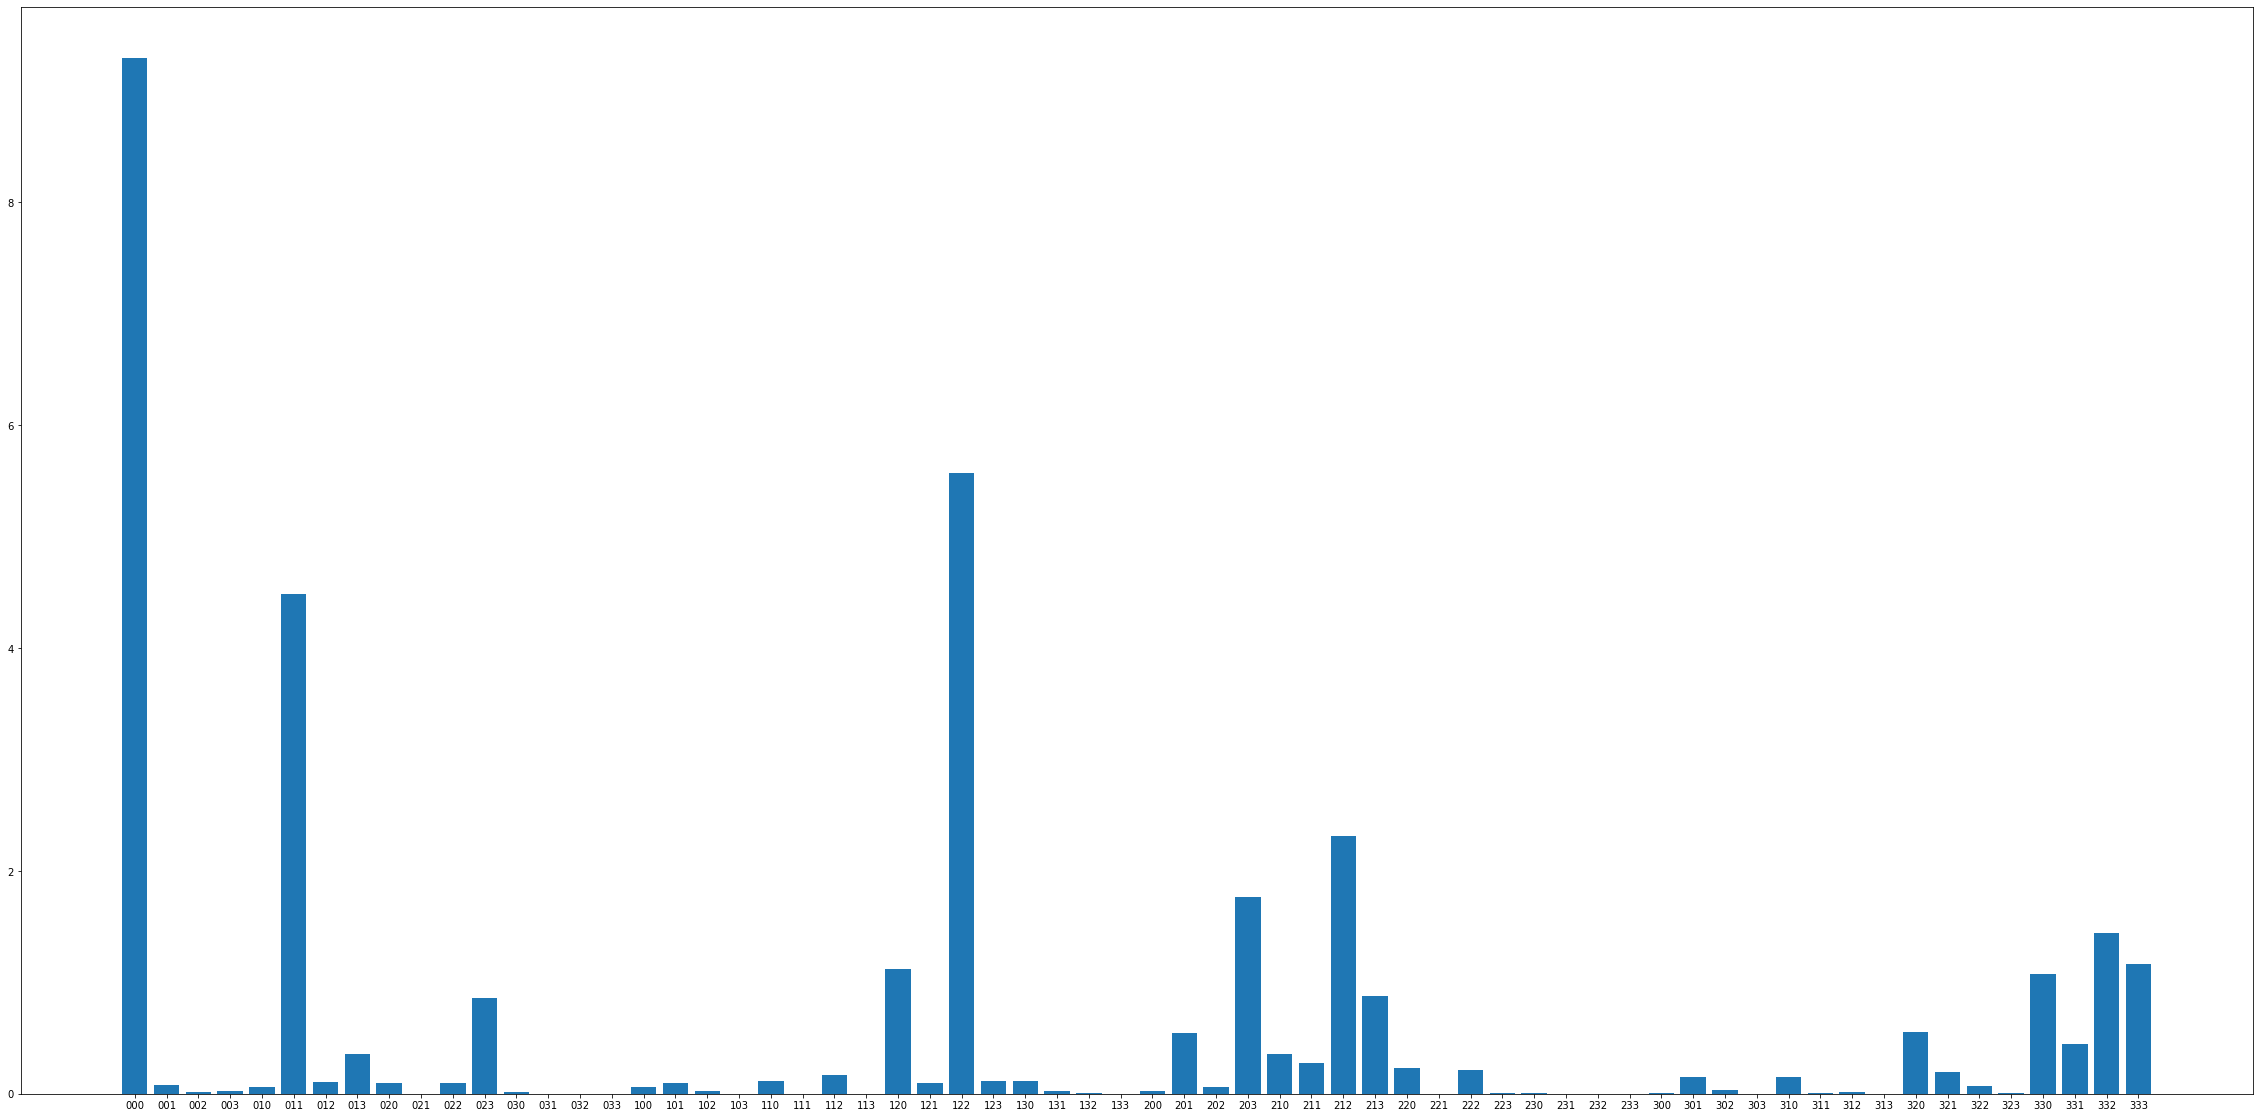

In [132]:
c=np.zeros((64))
count=0
mem=[]
for i in range(0,4):
  for j in range(0,4):
    for k in range(0,4):
      mem.append(str(i)+str(j)+str(k))
      c[count]=cda3[i,j,k]
      count=count+1

plt.figure(figsize=(4*10,2*10))
left=range(64)
height1=c
plt.xticks(left, mem)
p1 = plt.bar(left, height1, linewidth=2)

上のコアテンソルのグラフから、他の軸の因子ごとの特徴を作っているところをうまく探していき、どこが大事か見ていく

000,122,011この３つが上から3番までこの３つから調査をしていく

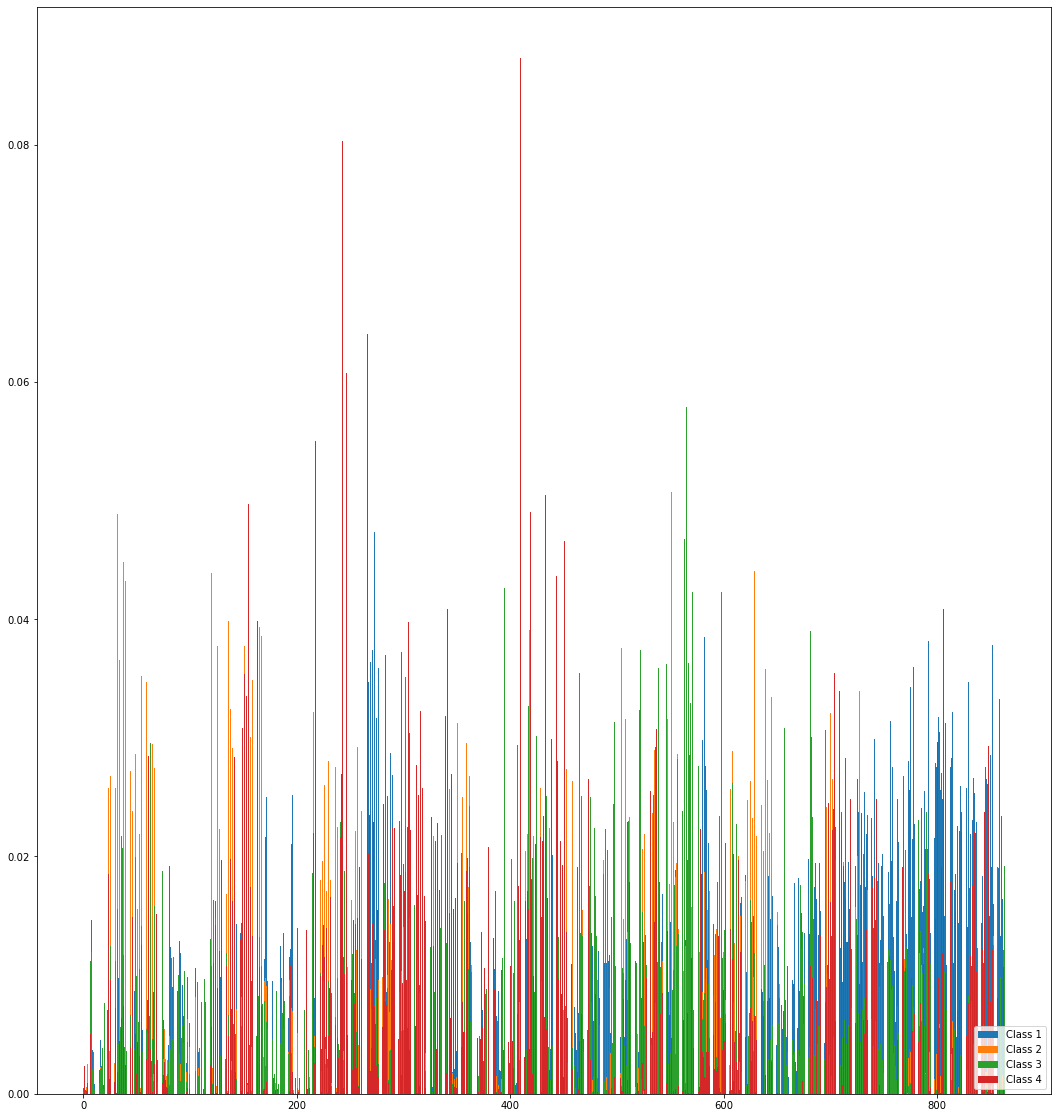

In [133]:
left=range(864)
plt.figure(figsize=(4*10,2*10))
height1=uda3[0][:,0]
height2=uda3[0][:,1]
height3=uda3[0][:,2]
height4=uda3[0][:,3]
plt.subplot(1,2,2)
p1 = plt.bar(left, height1, linewidth=2)
p2 = plt.bar(left, height2, linewidth=2)
p3 = plt.bar(left, height3, linewidth=2)
p4 = plt.bar(left, height4, linewidth=2)
plt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)

In [134]:
max_index = np.argmax(uda3[0][:,3])
print(max_index)

410


第一因子は２７３ 第二因子は551、第３因子565、第４因子410となっている。

空間軸に関しては量が多すぎるため、要素ごとで上から見ていく

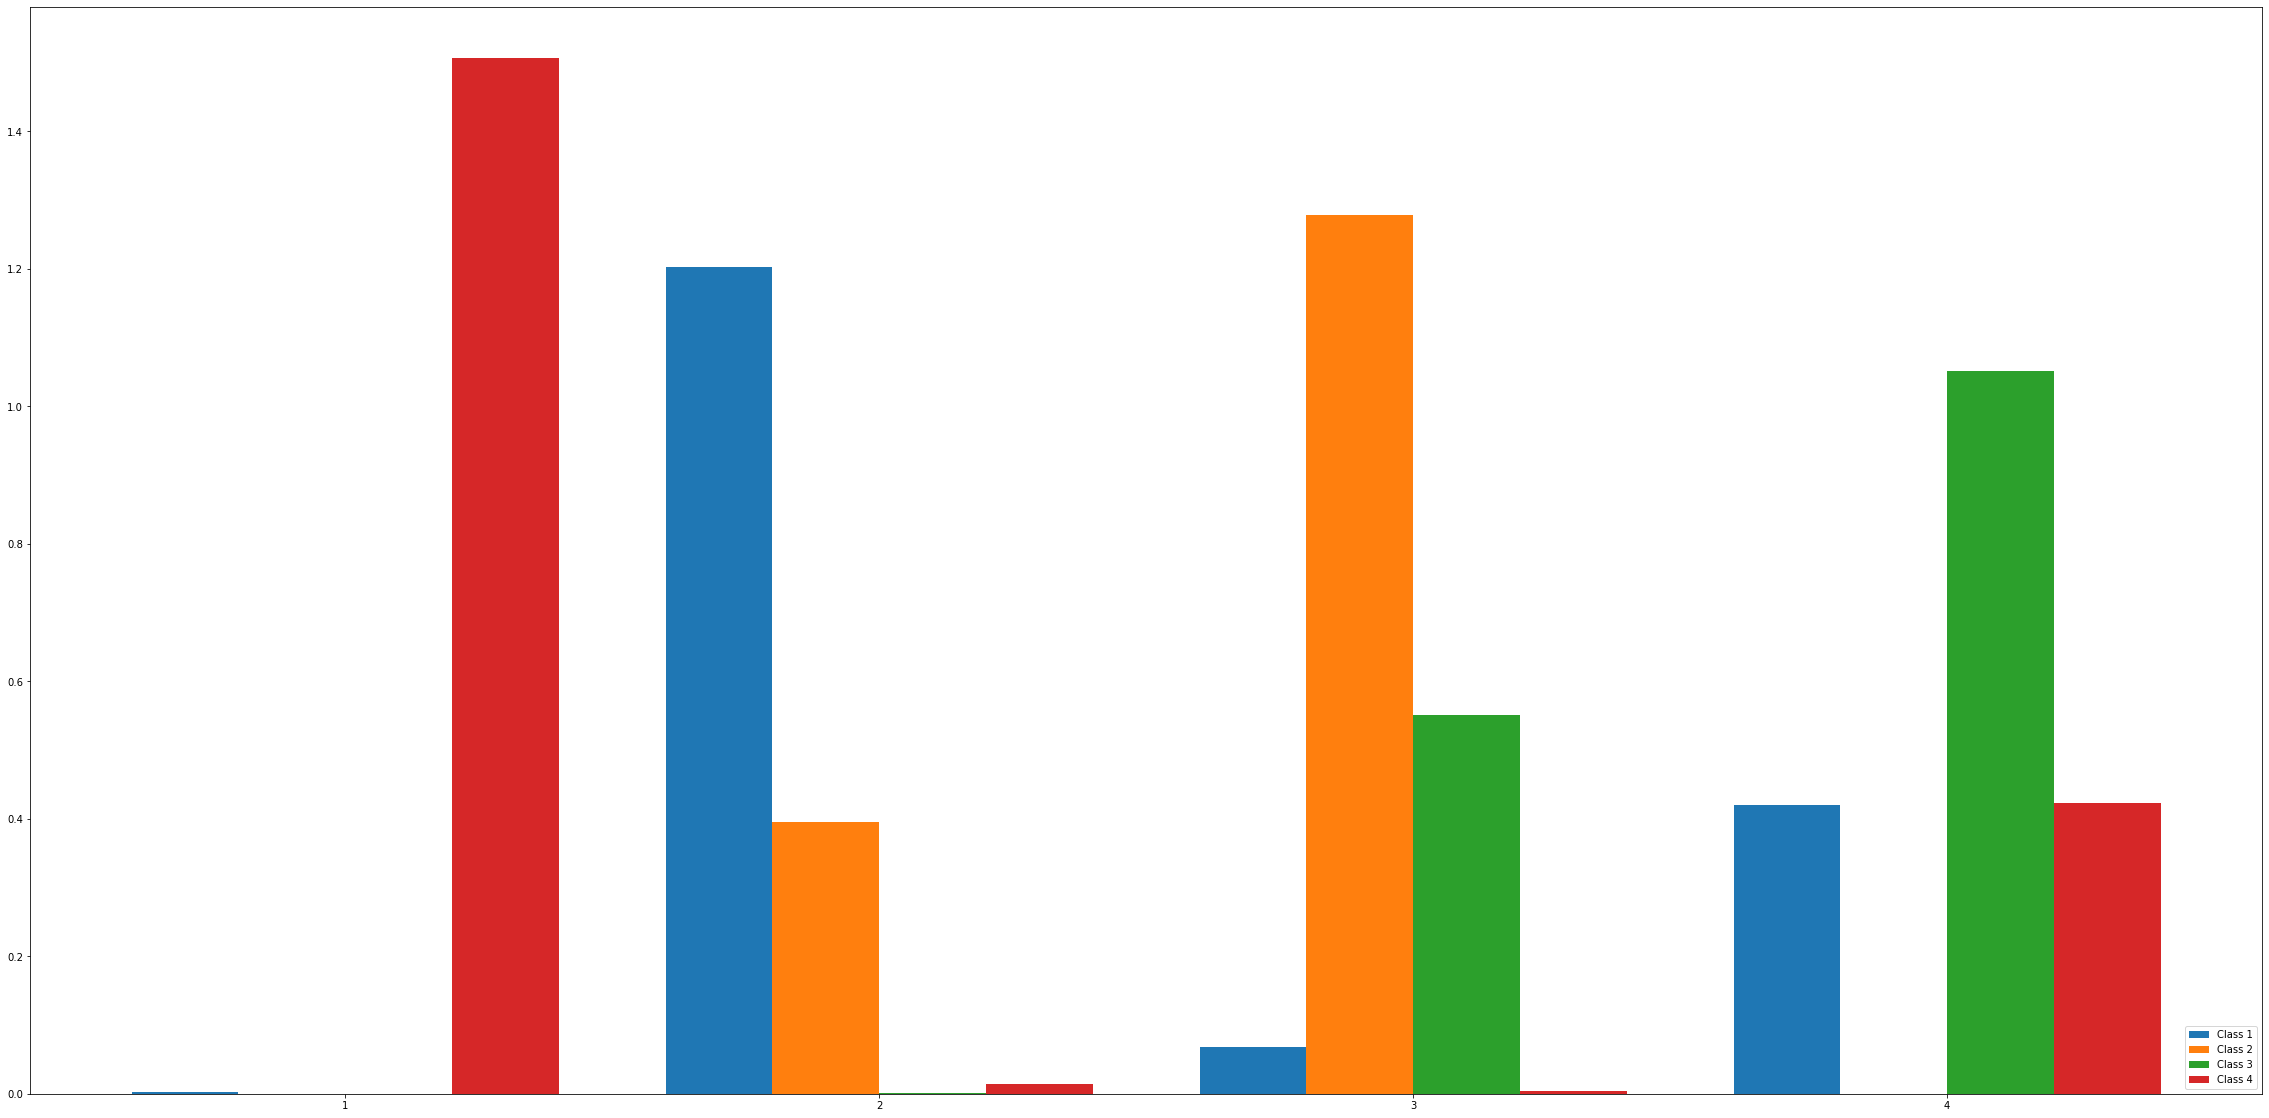

In [135]:
plt.figure(figsize=(4*10,2*10))
 
# 各系列のデータを用意
height1=uda3[1][:,0]
height2=uda3[1][:,1]
height3=uda3[1][:,2]
height4=uda3[1][:,3]
data = [height1, height2,height3,height4]

x = np.arange(len(height1))

labels = ["1", "2", "3", "4"]
# マージンを設定
margin = 0.2  #0 <margin< 1
totoal_width = 1 - margin
 
# 棒グラフをプロット
for i, h in enumerate(data):
  pos = x - totoal_width *( 1- (2*i+1)/len(data) )/2
  plt.bar(pos, h, width = totoal_width/len(data))
 
# ラベルの設定
plt.xticks(x, labels)
plt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)

因子のテンソル分解の結果より、重要なのは第一因子は2,第二因子は3、第三因子は4、第四因子は1が大事としっかり分かれている。

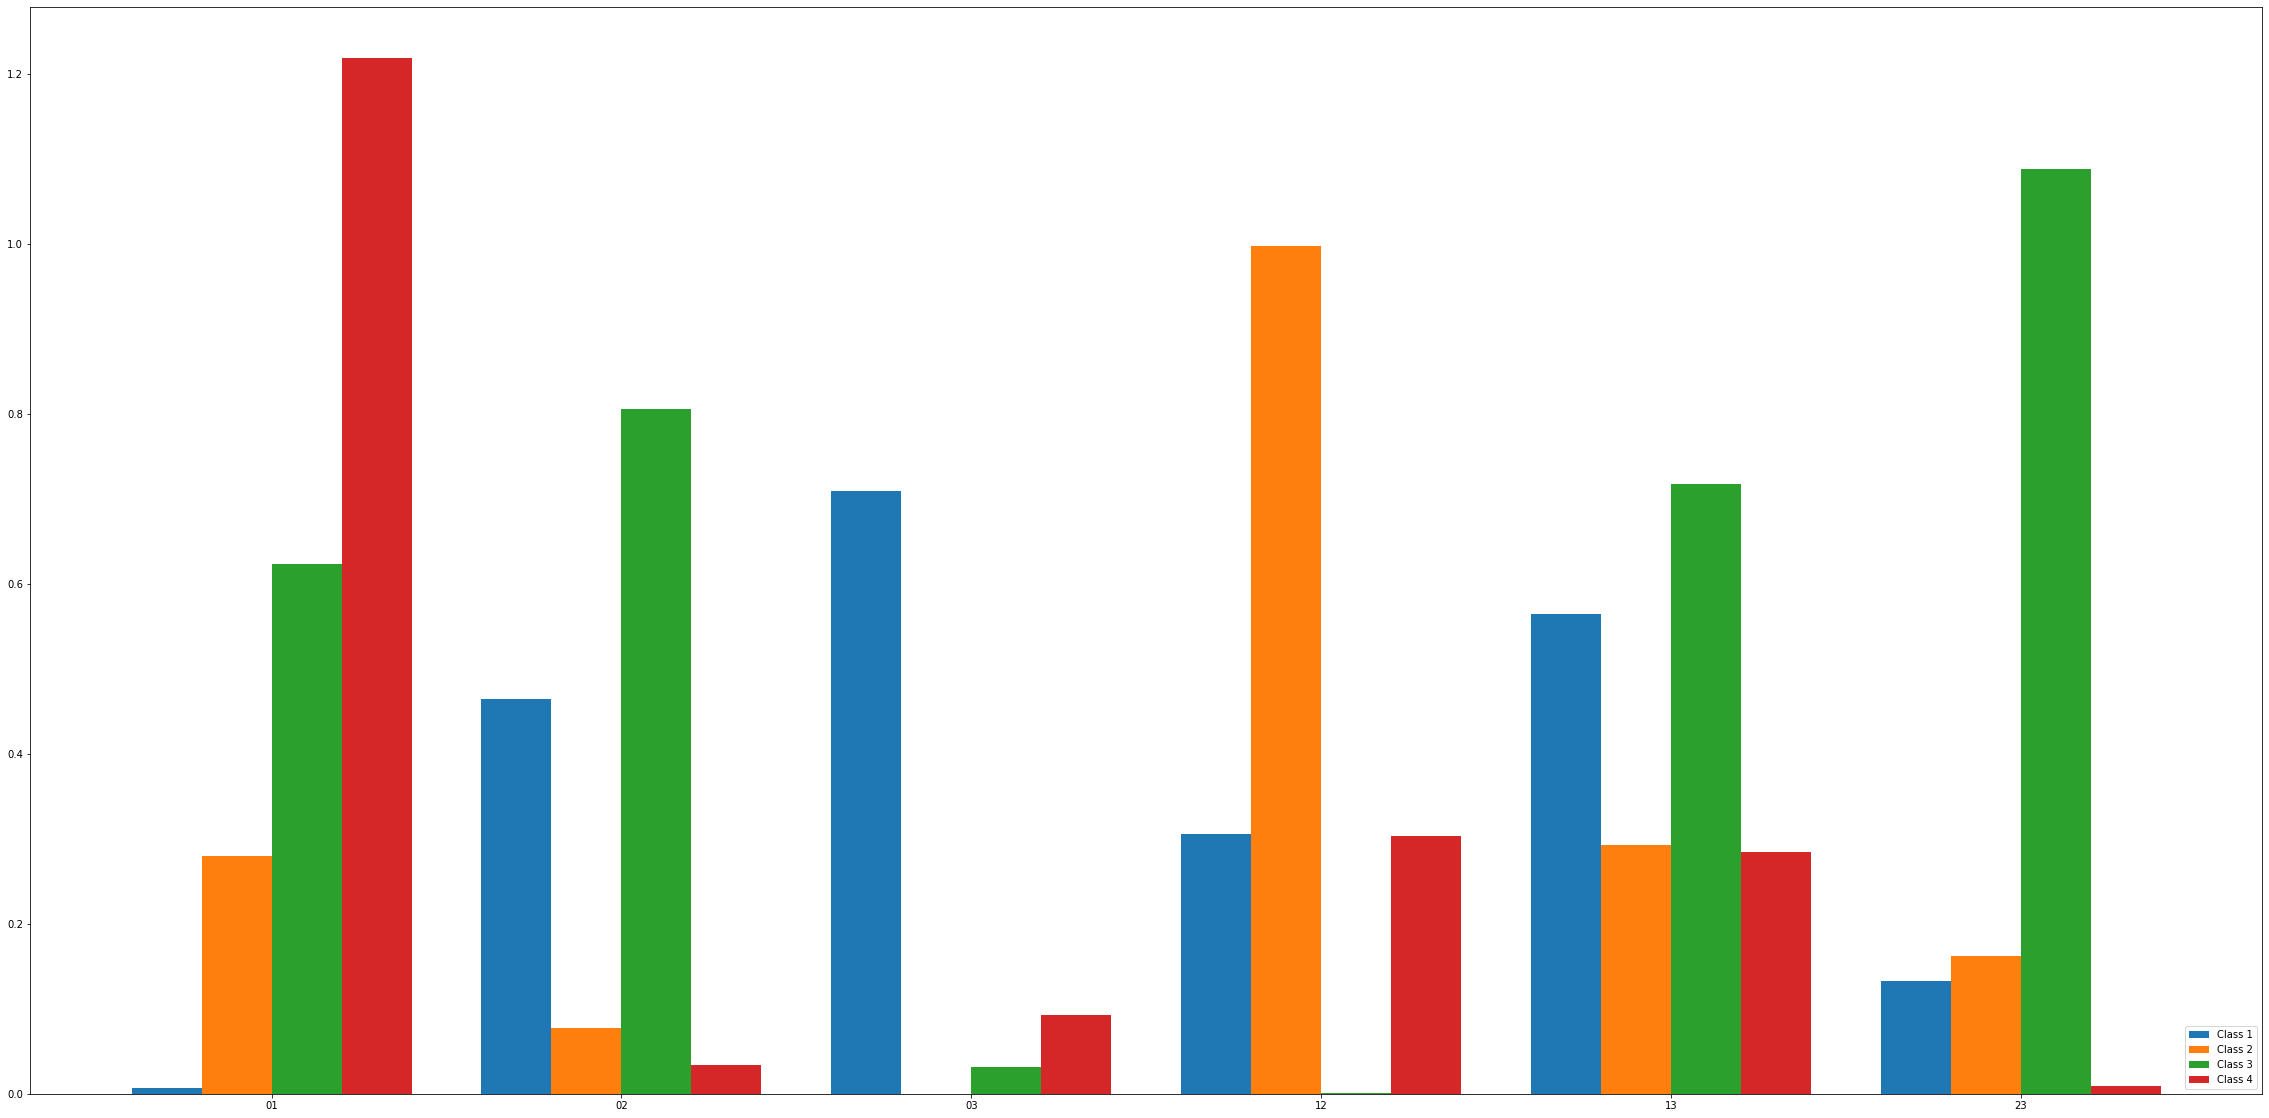

In [136]:
plt.figure(figsize=(4*10,2*10))
 
# 各系列のデータを用意
height1=uda3[2][:,0]
height2=uda3[2][:,1]
height3=uda3[2][:,2]
height4=uda3[2][:,3]
data = [height1, height2,height3,height4]

x = np.arange(len(height1))

labels = ["01", "02", "03", "12","13","23"]
# マージンを設定
margin = 0.2  #0 <margin< 1
totoal_width = 1 - margin
 
# 棒グラフをプロット
for i, h in enumerate(data):
  pos = x - totoal_width *( 1- (2*i+1)/len(data) )/2
  plt.bar(pos, h, width = totoal_width/len(data))
 
# ラベルの設定
plt.xticks(x, labels)
plt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)

第一因子は03、13,第二因子は12,第三因子は23,02、第四因子は01が大事となっている。

この後は空間の方も見て、コアテンソルと比較しながらどこが大事か見て、一個前のテンソルに戻り、次に時間軸と空間軸を見ながら、元データに戻り、分析する必要がある。

できるだけ絞るために一個前に戻った際に時間軸のデータを削減し、よりはっきりと違いがわかる部分を探し当てる必要がある。

差をとった軸は第一因子は03、13,第二因子は12,第三因子は23,02、第四因子は01

因子の軸、第一因子は2,第二因子は3、第三因子は4、第四因子は1

空間軸は第一因子は２７３ 第二因子は551、第３因子565、第４因子410となっている。

コアテンソルは000,122,011　軸順は1番目空間軸、2番目因子軸、3番目差軸



よって上より空間軸273、因子2の差03にとても大きな差がある。
次は、テンソル０、3のテンソル分解を行なって差だけでなく、範囲を縮めていく

In [137]:
tt0,u0=ntd(tensor_0,rank_list)
tt3,u3=ntd(tensor_all,rank_list)

In [138]:
print(u0[1][273,1])
print(u3[1][273,1])

0.0011384997811112836
1.2293565039355874e-22


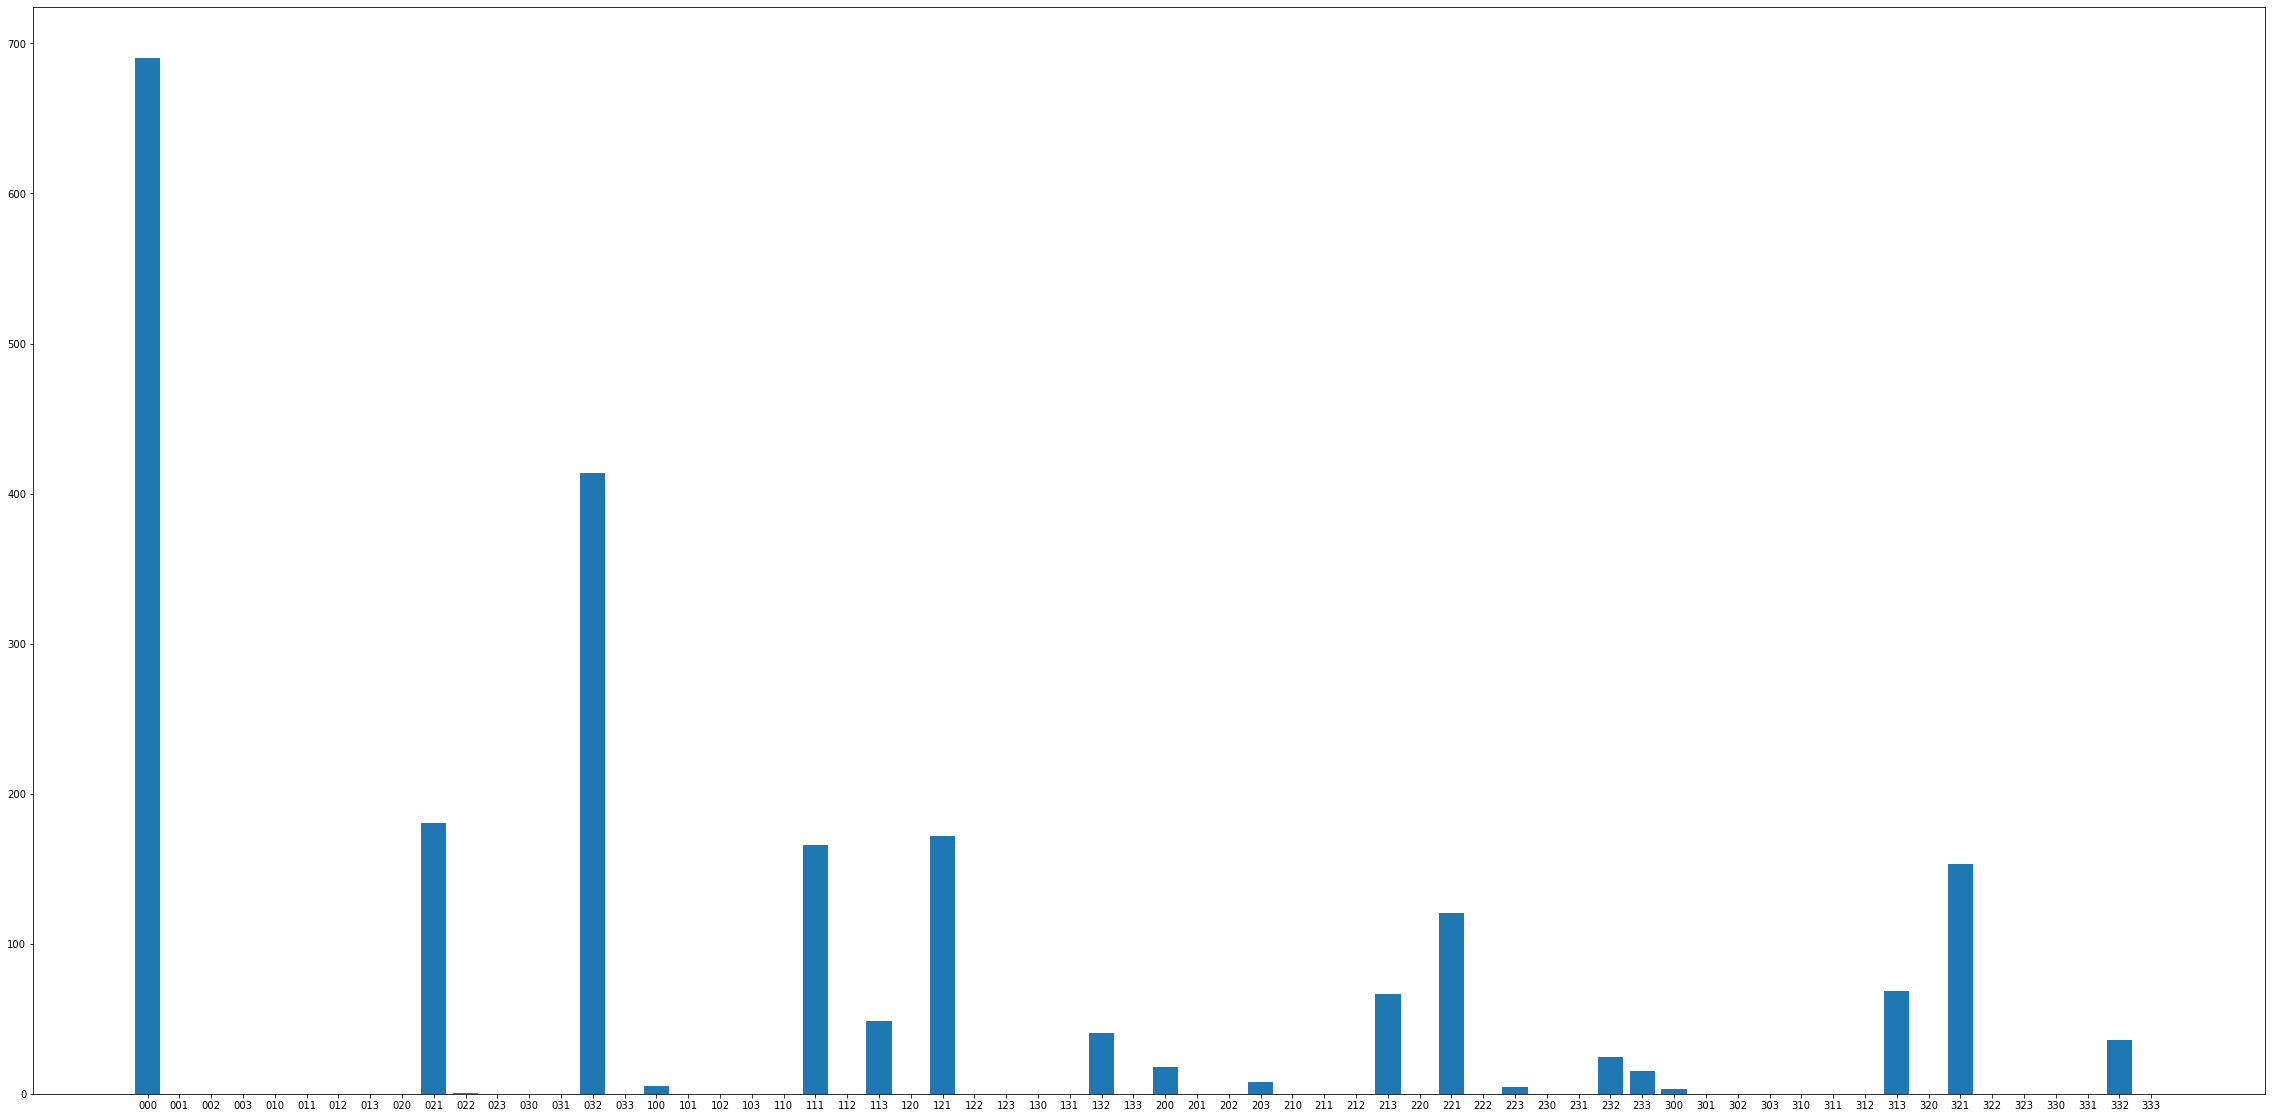

In [139]:
c=np.zeros((64))
count=0
mem=[]
for i in range(0,4):
  for j in range(0,4):
    for k in range(0,4):
      mem.append(str(i)+str(j)+str(k))
      c[count]=tt0[i,j,k]
      count=count+1

plt.figure(figsize=(4*10,2*10))
left=range(64)
height1=c
plt.xticks(left, mem)
p1 = plt.bar(left, height1, linewidth=2)

差分テンソルの結果より、空間軸は一旦置いておいて、因子２なので上のテンソルコアで？1？で関わりが大きそうな所をプロットすることで特徴を知れる。111と213、313って感じの順番

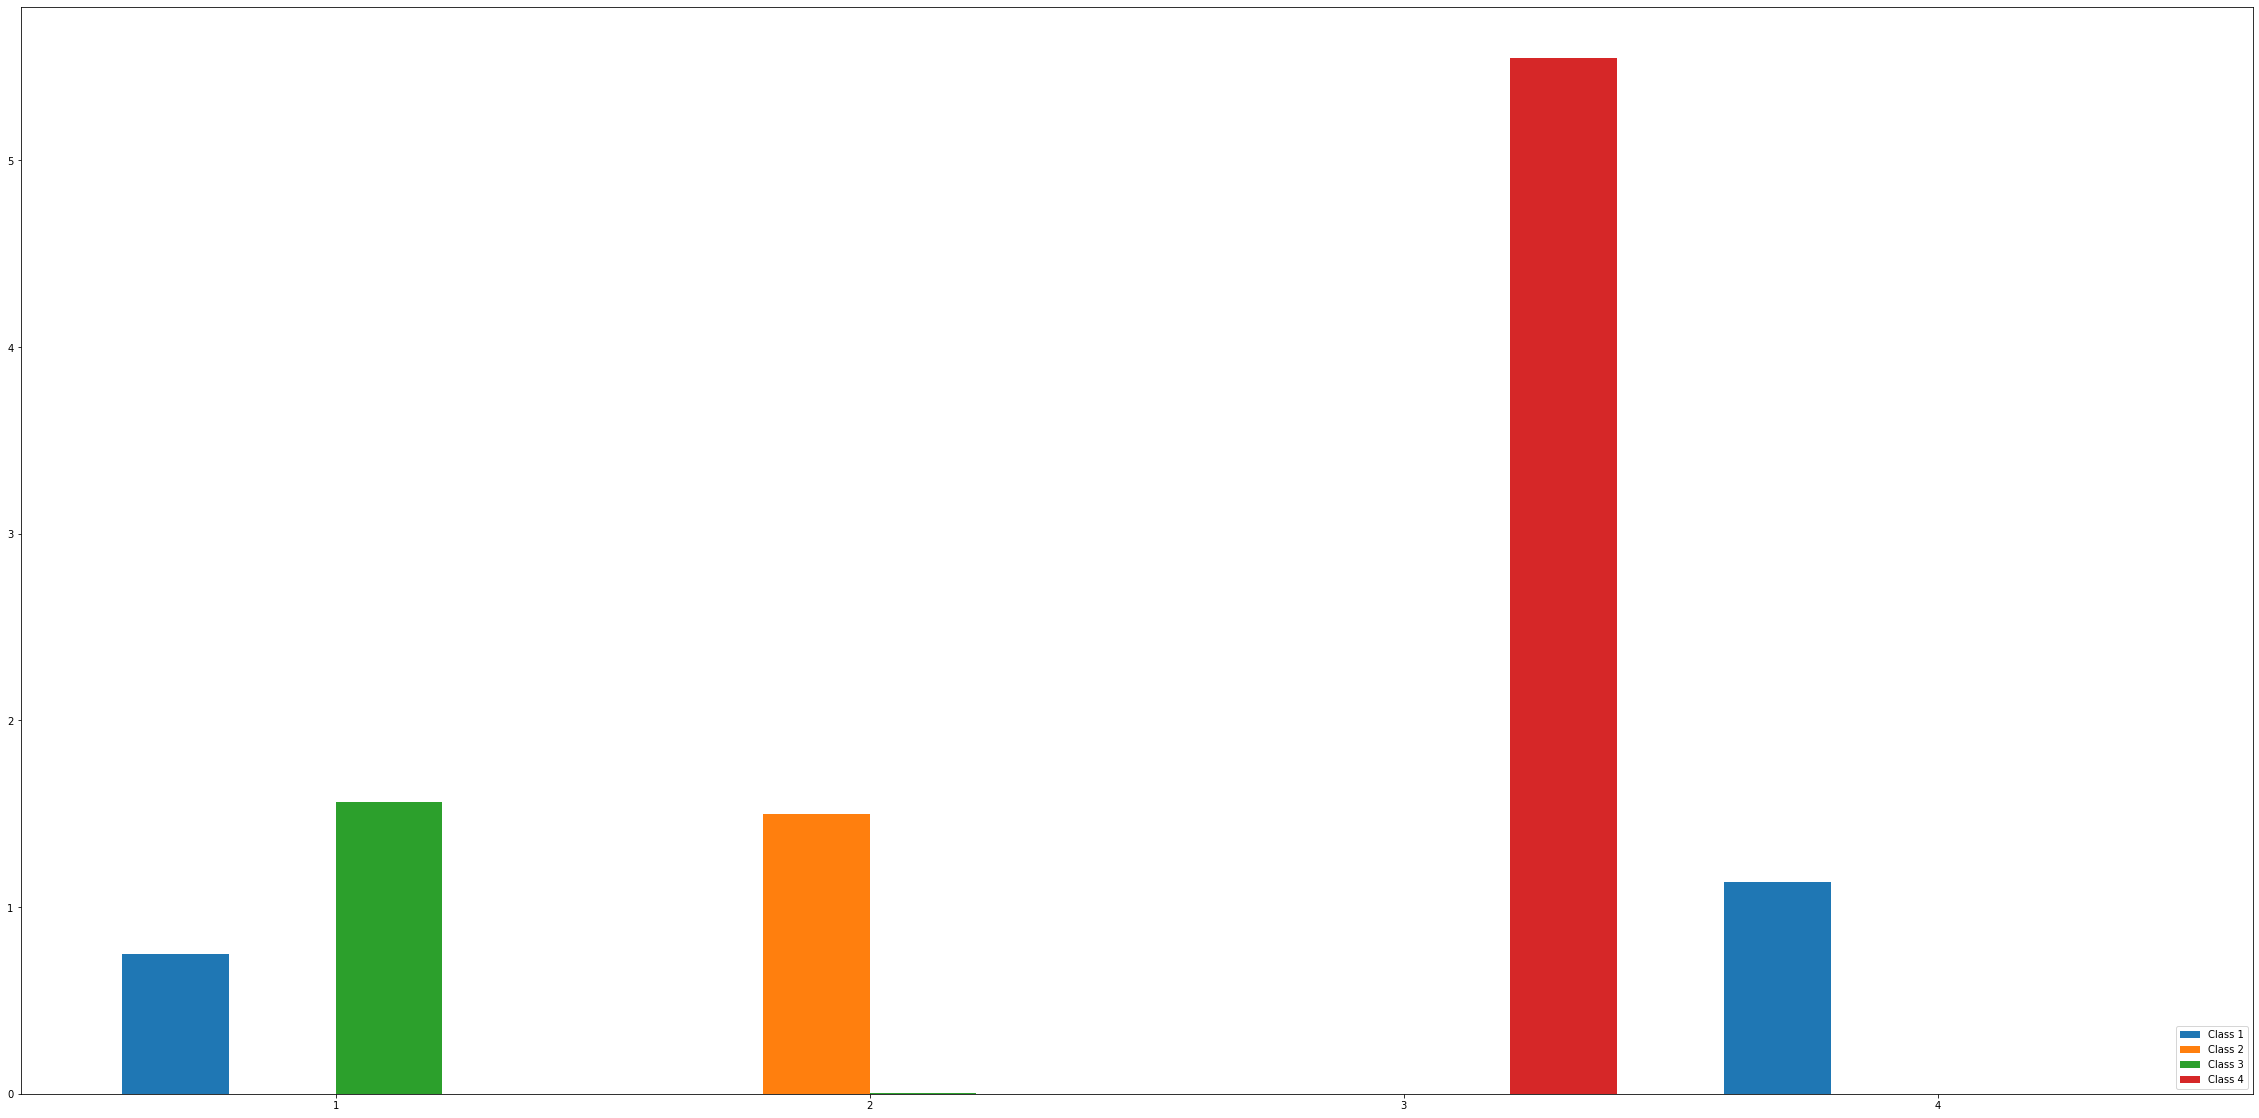

In [140]:
plt.figure(figsize=(4*10,2*10))
 
# 各系列のデータを用意
height1=u0[2][:,0]
height2=u0[2][:,1]
height3=u0[2][:,2]
height4=u0[2][:,3]
data = [height1, height2,height3,height4]

x = np.arange(len(height1))

labels = ["1", "2", "3", "4"]
# マージンを設定
margin = 0.2  #0 <margin< 1
totoal_width = 1 - margin
 
# 棒グラフをプロット
for i, h in enumerate(data):
  pos = x - totoal_width *( 1- (2*i+1)/len(data) )/2
  plt.bar(pos, h, width = totoal_width/len(data))
 
# ラベルの設定
plt.xticks(x, labels)
plt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)

([<matplotlib.axis.XTick at 0x1afc792d970>,
 <a list of 864 Text major ticklabel objects>)

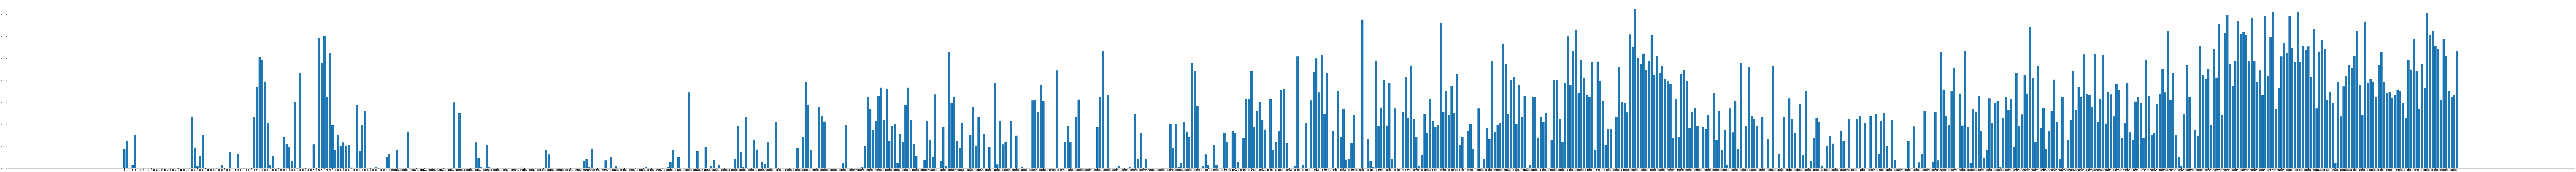

In [141]:
left=range(864)
plt.figure(figsize=(30*10,2*10))

height2=u0[1][:,1]


p2 = plt.bar(left, height2, linewidth=2)
#x = np.arange(len(height1))

# ラベルの設定
plt.xticks(left)

([<matplotlib.axis.XTick at 0x1afcc885ca0>,
 <a list of 221 Text major ticklabel objects>)

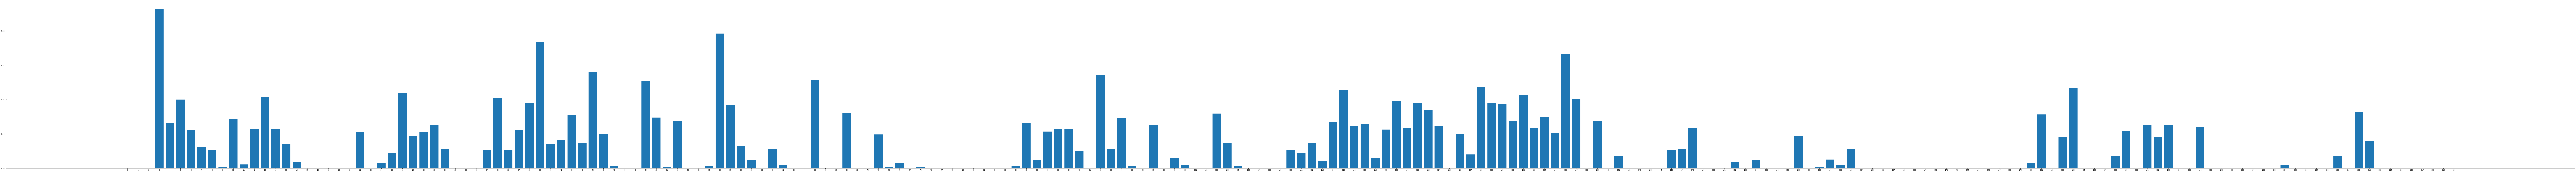

In [142]:
plt.figure(figsize=(30*10,2*10))

height2=u0[0][:,1]
x = np.arange(len(height2))

p2 = plt.bar(x, height2, linewidth=2)


# ラベルの設定
plt.xticks(x)

In [143]:
tt0,u0=ntd(tensor_0,rank_list)
tt0=np.zeros((4,4,4))
tt0[0,0,0]=1
tt0[1,1,1]=1
tt0[2,2,2]=1
tt0[3,3,3]=1

a0,b0=non_negative_tucker_core(tensor_0,rank_list,tt0)
a1,b1=non_negative_tucker_core(tensor_2,rank_list,tt0)

rec_errors
[0.8494674964820329, 0.8091155932996459, 0.7981031389296822, 0.7921048049986346, 0.7877168852027634, 0.7842515556381819, 0.7816063062370291, 0.7797073704267794, 0.7783357189137314, 0.7773557779512552, 0.7766521996296618, 0.7761419304015953, 0.7757642660554215, 0.7754763265359695, 0.7752421345048658, 0.7750406994859459, 0.7748577990043327, 0.7746791118115177, 0.7744794537272951, 0.774231538744684, 0.7739191922180411, 0.7734603902444003, 0.7728865480843405, 0.7723422350683528, 0.7718780943470304, 0.7714537780802788, 0.7710521670505383, 0.7706663746560476, 0.7702691781631712, 0.7698733590161645, 0.7695050959754607, 0.7691314801236281, 0.7687456299667519, 0.7683436090295392, 0.7678190097350902, 0.7671989974152136, 0.7666566377485647, 0.7661020359498725, 0.7654376966680699, 0.7648111898921746, 0.7640697114972526, 0.76338190133216, 0.7627469328807024, 0.7621930069182784, 0.7616106065695755, 0.7610529120217934, 0.7604417147280378, 0.759867116507816, 0.7594496893431456, 0.7590557461

01
誤差
01
158.22150025799408


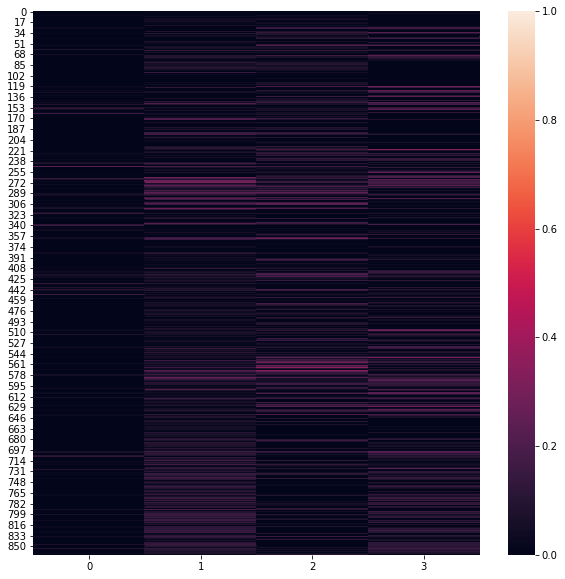

In [144]:
a=spaceRowHeatDifOut(b0,b1)

このこのテンソル分解後の要素をもう一度テンソルに再構成して、時間軸の要素だけのテンソルを作り、それを比較するというのはどう？

In [145]:
"""
np.set_printoptions(threshold=np.inf)
print(a)
"""

'\nnp.set_printoptions(threshold=np.inf)\nprint(a)\n'

In [146]:
#print(a[:,0].shape)

In [147]:
#a=a[:,:]

In [148]:
"""
def spaceRowHeatDifOutn(t0,t1):
  plt.figure(figsize=(1*10,1*10))
  a=t0
  b=t1
  ab=abs(a-b)

  print("01")
  sns.heatmap(ab,vmin=0, vmax=0.5)

  print("誤差")
  print("01")
  print(ab.sum())
  return ab
"""

'\ndef spaceRowHeatDifOutn(t0,t1):\n  plt.figure(figsize=(1*10,1*10))\n  a=t0\n  b=t1\n  ab=abs(a-b)\n\n  print("01")\n  sns.heatmap(ab,vmin=0, vmax=0.5)\n\n  print("誤差")\n  print("01")\n  print(ab.sum())\n  return ab\n'

In [149]:
#print(a.shape)

In [150]:
"""
a=spaceRowHeatDifOut(b0,b1)
y=np.argsort(a[:,3]*(10**20),kind='mergesort')
b0n=b0[1][:,:]
b1n=b1[1][:,:]
b0n=b0n[y,:]
b1n=b1n[y,:]
a=spaceRowHeatDifOutn(b0n,b1n)
y=np.argsort(a[:,2]*(10**20),kind='mergesort')
b0n=b0n[y,:]
b1n=b1n[y,:]
a=spaceRowHeatDifOutn(b0n,b1n)
y=np.argsort(a[:,1]*(10**20),kind='mergesort')
b0n=b0n[y,:]
b1n=b1n[y,:]
a=spaceRowHeatDifOutn(b0n,b1n)
y=np.argsort(a[:,0]*(10**20),kind='mergesort')
b0n=b0n[y,:]
b1n=b1n[y,:]
a=spaceRowHeatDifOutn(b0n,b1n)
"""

"\na=spaceRowHeatDifOut(b0,b1)\ny=np.argsort(a[:,3]*(10**20),kind='mergesort')\nb0n=b0[1][:,:]\nb1n=b1[1][:,:]\nb0n=b0n[y,:]\nb1n=b1n[y,:]\na=spaceRowHeatDifOutn(b0n,b1n)\ny=np.argsort(a[:,2]*(10**20),kind='mergesort')\nb0n=b0n[y,:]\nb1n=b1n[y,:]\na=spaceRowHeatDifOutn(b0n,b1n)\ny=np.argsort(a[:,1]*(10**20),kind='mergesort')\nb0n=b0n[y,:]\nb1n=b1n[y,:]\na=spaceRowHeatDifOutn(b0n,b1n)\ny=np.argsort(a[:,0]*(10**20),kind='mergesort')\nb0n=b0n[y,:]\nb1n=b1n[y,:]\na=spaceRowHeatDifOutn(b0n,b1n)\n"

In [151]:
#元データ
"""
tensor_0 = df_cluster0.values.reshape(-1, 864, 4)
#print(tensor_0[1,0,0])
tensor_1 = df_cluster1.values.reshape(-1, 864, 4)
#print(tensor_1[1,0,0])
tensor_2 = df_cluster2.values.reshape(-1, 864, 4)
#print(tensor_2[1,0,0])
tensor_all = df_clusterall.values.reshape(-1, 864, 4)
#print(tensor_2[1,0,0])
"""

'\ntensor_0 = df_cluster0.values.reshape(-1, 864, 4)\n#print(tensor_0[1,0,0])\ntensor_1 = df_cluster1.values.reshape(-1, 864, 4)\n#print(tensor_1[1,0,0])\ntensor_2 = df_cluster2.values.reshape(-1, 864, 4)\n#print(tensor_2[1,0,0])\ntensor_all = df_clusterall.values.reshape(-1, 864, 4)\n#print(tensor_2[1,0,0])\n'

In [152]:
"""
left=range(864)
height1=a[:,1]
p1 = plt.plot(left, height1, linewidth=2)
"""

'\nleft=range(864)\nheight1=a[:,1]\np1 = plt.plot(left, height1, linewidth=2)\n'

並び替えがうまくいっていない→多分うまくいった

In [153]:
"""
t0=tensor_0
t1=tensor_2
#print(t0[:,0,:])
"""

'\nt0=tensor_0\nt1=tensor_2\n#print(t0[:,0,:])\n'

In [154]:
"""
b0n=b0[1][:,:]
b1n=b1[1][:,:]
b0n=b0n[y,:]
b1n=b1n[y,:]
"""

'\nb0n=b0[1][:,:]\nb1n=b1[1][:,:]\nb0n=b0n[y,:]\nb1n=b1n[y,:]\n'

In [155]:
#spaceRowHeatDifOutn(b0n,b1n)

In [156]:
"""
y1=np.argsort(a[:,1]*(10**20))
"""

'\ny1=np.argsort(a[:,1]*(10**20))\n'

In [157]:
"""
b0n=b0n[y1,:]
b1n=b1n[y1,:]
"""

'\nb0n=b0n[y1,:]\nb1n=b1n[y1,:]\n'

In [158]:

#spaceRowHeatDifOutn(b0n,b1n)

In [159]:
"""
t0=tensor_0[:,y,:]
t1=tensor_2[:,y,:]
"""

'\nt0=tensor_0[:,y,:]\nt1=tensor_2[:,y,:]\n'

In [160]:
#t0[0,0,3]

In [161]:
#print(t1[:,863,:].shape)

In [162]:
"""
left=range(221)
cnt=0
for pt in range(859,863):
  plt.figure(figsize=(2*10,2*10))
  height1=t0[:,pt,0]
  height2=t0[:,pt,1]
  height3=t0[:,pt,2]
  height4=t0[:,pt,3]
  cnt=cnt+1
  plt.subplot(4,1,cnt)
  p1 = plt.plot(left, height1, linewidth=2)
  p2 = plt.plot(left, height2, linewidth=2)
  p3 = plt.plot(left, height3, linewidth=2)
  p4 = plt.plot(left, height4, linewidth=2)
  plt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)

"""
"""
left=range(117)
height1=t1[:,pt,0]
height2=t1[:,pt,1]
height3=t1[:,pt,2]
height4=t1[:,pt,3]
plt.subplot(1,2,2)
p1 = plt.plot(left, height1, linewidth=2)
p2 = plt.plot(left, height2, linewidth=2)
p3 = plt.plot(left, height3, linewidth=2)
p4 = plt.plot(left, height4, linewidth=2)
plt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)
"""


'\nleft=range(117)\nheight1=t1[:,pt,0]\nheight2=t1[:,pt,1]\nheight3=t1[:,pt,2]\nheight4=t1[:,pt,3]\nplt.subplot(1,2,2)\np1 = plt.plot(left, height1, linewidth=2)\np2 = plt.plot(left, height2, linewidth=2)\np3 = plt.plot(left, height3, linewidth=2)\np4 = plt.plot(left, height4, linewidth=2)\nplt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)\n'

In [163]:
"""
left=range(117)
cnt=0
for pt in range(0,4):
  plt.figure(figsize=(2*10,2*10))
  cnt=cnt+1
  plt.subplot(4,1,cnt)
  height1=t1[:,pt,0]
  height2=t1[:,pt,1]
  height3=t1[:,pt,2]
  height4=t1[:,pt,3]
  p1 = plt.plot(left, height1, linewidth=2)
  p2 = plt.plot(left, height2, linewidth=2)
  p3 = plt.plot(left, height3, linewidth=2)
  p4 = plt.plot(left, height4, linewidth=2)
  plt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)
  """

'\nleft=range(117)\ncnt=0\nfor pt in range(0,4):\n  plt.figure(figsize=(2*10,2*10))\n  cnt=cnt+1\n  plt.subplot(4,1,cnt)\n  height1=t1[:,pt,0]\n  height2=t1[:,pt,1]\n  height3=t1[:,pt,2]\n  height4=t1[:,pt,3]\n  p1 = plt.plot(left, height1, linewidth=2)\n  p2 = plt.plot(left, height2, linewidth=2)\n  p3 = plt.plot(left, height3, linewidth=2)\n  p4 = plt.plot(left, height4, linewidth=2)\n  plt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)\n  '

In [164]:
"""
cnt=0
plt.figure(figsize=(2*10,2*10))
for pt in range(859,863):
  cnt=cnt+1
  plt.subplot(2,2,cnt)
  left=t0[:,pt,0]
  height=t0[:,pt,1]
  p1 = plt.scatter(left, height, linewidth=2)
  left=t1[:,pt,0]
  height=t1[:,pt,1]
  p2 = plt.scatter(left, height, linewidth=2)
  """

'\ncnt=0\nplt.figure(figsize=(2*10,2*10))\nfor pt in range(859,863):\n  cnt=cnt+1\n  plt.subplot(2,2,cnt)\n  left=t0[:,pt,0]\n  height=t0[:,pt,1]\n  p1 = plt.scatter(left, height, linewidth=2)\n  left=t1[:,pt,0]\n  height=t1[:,pt,1]\n  p2 = plt.scatter(left, height, linewidth=2)\n  '

In [165]:
"""
cnt=0
plt.figure(figsize=(2*10,2*10))
for pt in range(0,4):
  cnt=cnt+1
  plt.subplot(2,2,cnt)
  left=t0[:,pt,2]
  height=t0[:,pt,1]
  p1 = plt.scatter(left, height, linewidth=2)
  left=t1[:,pt,2]
  height=t1[:,pt,1]
  p2 = plt.scatter(left, height, linewidth=2)
  """

'\ncnt=0\nplt.figure(figsize=(2*10,2*10))\nfor pt in range(0,4):\n  cnt=cnt+1\n  plt.subplot(2,2,cnt)\n  left=t0[:,pt,2]\n  height=t0[:,pt,1]\n  p1 = plt.scatter(left, height, linewidth=2)\n  left=t1[:,pt,2]\n  height=t1[:,pt,1]\n  p2 = plt.scatter(left, height, linewidth=2)\n  '

In [166]:
"""
cnt=0
plt.figure(figsize=(2*10,2*10))
for pt in range(859,863):
  cnt=cnt+1
  plt.subplot(2,2,cnt)
  left=t0[:,pt,0]
  height=t0[:,pt,3]
  p1 = plt.scatter(left, height, linewidth=2)
  left=t1[:,pt,0]
  height=t1[:,pt,3]
  p2 = plt.scatter(left, height, linewidth=2)
  """

'\ncnt=0\nplt.figure(figsize=(2*10,2*10))\nfor pt in range(859,863):\n  cnt=cnt+1\n  plt.subplot(2,2,cnt)\n  left=t0[:,pt,0]\n  height=t0[:,pt,3]\n  p1 = plt.scatter(left, height, linewidth=2)\n  left=t1[:,pt,0]\n  height=t1[:,pt,3]\n  p2 = plt.scatter(left, height, linewidth=2)\n  '

In [167]:
"""
cnt=0
plt.figure(figsize=(2*10,2*10))
for pt in range(859,863):
  cnt=cnt+1
  plt.subplot(2,2,cnt)
  left=t0[:,pt,0]
  height=t0[:,pt,3]
  p1 = plt.scatter(left, height, linewidth=2)
  left=t1[:,pt,0]
  height=t1[:,pt,3]
  p2 = plt.scatter(left, height, linewidth=2)
  """

'\ncnt=0\nplt.figure(figsize=(2*10,2*10))\nfor pt in range(859,863):\n  cnt=cnt+1\n  plt.subplot(2,2,cnt)\n  left=t0[:,pt,0]\n  height=t0[:,pt,3]\n  p1 = plt.scatter(left, height, linewidth=2)\n  left=t1[:,pt,0]\n  height=t1[:,pt,3]\n  p2 = plt.scatter(left, height, linewidth=2)\n  '

In [168]:
"""
cnt=0
plt.figure(figsize=(2*10,2*10))
pt=863
for n in range(0,4):
  for m in range(0,4):
    if n>=m: continue
    cnt=cnt+1
    plt.subplot(3,2,cnt)
    left=t0[:,pt,n]
    height=t0[:,pt,m]
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    p1 = plt.scatter(left, height, linewidth=2)
    left=t1[:,pt,n]
    height=t1[:,pt,m]
    p2 = plt.scatter(left, height, linewidth=2)
    plt.title(str(n)+str(m))
"""

'\ncnt=0\nplt.figure(figsize=(2*10,2*10))\npt=863\nfor n in range(0,4):\n  for m in range(0,4):\n    if n>=m: continue\n    cnt=cnt+1\n    plt.subplot(3,2,cnt)\n    left=t0[:,pt,n]\n    height=t0[:,pt,m]\n    plt.xlim(-3,3)\n    plt.ylim(-3,3)\n    p1 = plt.scatter(left, height, linewidth=2)\n    left=t1[:,pt,n]\n    height=t1[:,pt,m]\n    p2 = plt.scatter(left, height, linewidth=2)\n    plt.title(str(n)+str(m))\n'

In [169]:
"""
cnt=0
plt.figure(figsize=(2*10,2*10))
pt=1
for n in range(0,4):
  for m in range(0,4):
    if n>=m: continue
    cnt=cnt+1
    plt.subplot(3,2,cnt)
    left=t0[:,pt,n]
    height=t0[:,pt,m]
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    p1 = plt.scatter(left, height, linewidth=2)
    left=t1[:,pt,n]
    height=t1[:,pt,m]
    p2 = plt.scatter(left, height, linewidth=2)
    plt.title(str(n)+str(m))
"""

'\ncnt=0\nplt.figure(figsize=(2*10,2*10))\npt=1\nfor n in range(0,4):\n  for m in range(0,4):\n    if n>=m: continue\n    cnt=cnt+1\n    plt.subplot(3,2,cnt)\n    left=t0[:,pt,n]\n    height=t0[:,pt,m]\n    plt.xlim(-3,3)\n    plt.ylim(-3,3)\n    p1 = plt.scatter(left, height, linewidth=2)\n    left=t1[:,pt,n]\n    height=t1[:,pt,m]\n    p2 = plt.scatter(left, height, linewidth=2)\n    plt.title(str(n)+str(m))\n'

In [170]:
"""
pt=863
print(0)
dist = np.linalg.norm(t1[:117,pt,0]-t0[:117,pt,0])
print(dist)
print(1)
dist = np.linalg.norm(t1[:117,pt,1]-t0[:117,pt,1])
print(dist)
print(2)
dist = np.linalg.norm(t1[:117,pt,2]-t0[:117,pt,2])
print(dist)
print(3)
dist = np.linalg.norm(t1[:117,pt,3]-t0[:117,pt,3])
print(dist)
"""

'\npt=863\nprint(0)\ndist = np.linalg.norm(t1[:117,pt,0]-t0[:117,pt,0])\nprint(dist)\nprint(1)\ndist = np.linalg.norm(t1[:117,pt,1]-t0[:117,pt,1])\nprint(dist)\nprint(2)\ndist = np.linalg.norm(t1[:117,pt,2]-t0[:117,pt,2])\nprint(dist)\nprint(3)\ndist = np.linalg.norm(t1[:117,pt,3]-t0[:117,pt,3])\nprint(dist)\n'

In [171]:
"""
pt=0
print(0)
dist = np.linalg.norm(t1[:117,pt,0]-t0[:117,pt,0])
print(dist)
print(1)
dist = np.linalg.norm(t1[:117,pt,1]-t0[:117,pt,1])
print(dist)
print(2)
dist = np.linalg.norm(t1[:117,pt,2]-t0[:117,pt,2])
print(dist)
print(3)
dist = np.linalg.norm(t1[:117,pt,3]-t0[:117,pt,3])
print(dist)
"""

'\npt=0\nprint(0)\ndist = np.linalg.norm(t1[:117,pt,0]-t0[:117,pt,0])\nprint(dist)\nprint(1)\ndist = np.linalg.norm(t1[:117,pt,1]-t0[:117,pt,1])\nprint(dist)\nprint(2)\ndist = np.linalg.norm(t1[:117,pt,2]-t0[:117,pt,2])\nprint(dist)\nprint(3)\ndist = np.linalg.norm(t1[:117,pt,3]-t0[:117,pt,3])\nprint(dist)\n'

In [172]:
"""
for pt in range(864):
  print(pt)
  dist = np.linalg.norm(t1[:117,pt,:]-t0[:117,pt,:])
  print(dist)
"""

'\nfor pt in range(864):\n  print(pt)\n  dist = np.linalg.norm(t1[:117,pt,:]-t0[:117,pt,:])\n  print(dist)\n'

違いが大きいほうが散らばりが大きいのが見てわかる、これを類似度図るからのその変数の組み合わせから何が原因となっているのか探る、テンソルコアの書き換え

再度12のところでグループ分けするのもありかも

今はラックだけの要素を用いて比較しているが、他の要素を使うべきやと思う

In [173]:
"""
pt=863
plt.figure(figsize=(2*10,2*10))
left=range(221)
height1=t0[:,pt,0]
height2=t0[:,pt,1]
height3=t0[:,pt,2]
height4=t0[:,pt,3]
plt.subplot(1,2,1)
p1 = plt.plot(left, height1, linewidth=2)
p2 = plt.plot(left, height2, linewidth=2)
p3 = plt.plot(left, height3, linewidth=2)
p4 = plt.plot(left, height4, linewidth=2)
plt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)
left=range(117)
height1=t1[:,pt,0]
height2=t1[:,pt,1]
height3=t1[:,pt,2]
height4=t1[:,pt,3]
plt.subplot(1,2,2)
p1 = plt.plot(left, height1, linewidth=2)
p2 = plt.plot(left, height2, linewidth=2)
p3 = plt.plot(left, height3, linewidth=2)
p4 = plt.plot(left, height4, linewidth=2)
plt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)
"""

'\npt=863\nplt.figure(figsize=(2*10,2*10))\nleft=range(221)\nheight1=t0[:,pt,0]\nheight2=t0[:,pt,1]\nheight3=t0[:,pt,2]\nheight4=t0[:,pt,3]\nplt.subplot(1,2,1)\np1 = plt.plot(left, height1, linewidth=2)\np2 = plt.plot(left, height2, linewidth=2)\np3 = plt.plot(left, height3, linewidth=2)\np4 = plt.plot(left, height4, linewidth=2)\nplt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)\nleft=range(117)\nheight1=t1[:,pt,0]\nheight2=t1[:,pt,1]\nheight3=t1[:,pt,2]\nheight4=t1[:,pt,3]\nplt.subplot(1,2,2)\np1 = plt.plot(left, height1, linewidth=2)\np2 = plt.plot(left, height2, linewidth=2)\np3 = plt.plot(left, height3, linewidth=2)\np4 = plt.plot(left, height4, linewidth=2)\nplt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)\n'

ここからもう一度テンソルに戻って、一個の要素を固定したり、影響力が大きいところの実際の数値の確認

## 要素の削除と再テンソル化

In [174]:
#axis=0,奥行,axis=1,行、axis=2,列
def spaceDelete(t,n):
  np.delete(t,n,axis=1)

#axis=0,奥行,axis=1,行、axis=2,列
def timeDelete(t,n):
  np.delete(t,n,axis=2)

def measureDelete(t,n):
  np.delete(t,n,axis=0)

In [175]:
#multidelete
#axis=0,奥行,axis=1,行、axis=2,列
def spaceMultiDelete(n):
  t0=np.delete(tensor_0,n,axis=1)
  t1=np.delete(tensor_1,n,axis=1)
  t2=np.delete(tensor_2,n,axis=1)
  t3=np.delete(tensor_all,n,axis=1)
  return t0,t1,t2,t3

In [176]:
nt0,nt1,nt2,nt3=spaceMultiDelete(153)

In [177]:
#plotFream(nt0,nt1,nt2,nt3,rank_list)

空間軸方向でも、umapなどでテンソルを作る

In [178]:
def plotData(pltdata):
  plt.figure(figsize=(12, 12))
  plt.scatter(pltdata[:,0], pltdata[:,1], s=3)
  plt.colorbar()
  plt.grid()
  plt.show()

In [179]:
!pip3 install umap-learn

  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82826 sha256=79aad48c0d95262ec8ba8db54778af537eb8878c673d278c73273483633dd9d8
  Stored in directory: c:\users\cocon\appdata\local\pip\cache\wheels\a9\3a\67\06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55501 sha256=0079b55874d32a164a5a9a5674bea5b810662c3a11c63b3b99b5cdedc123e6e8
  Stored in directory: c:\users\cocon\appdata\local\pip\cache\wheels\1c\63\3a\29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


ERROR: pynndescent 0.5.8 has requirement numba>=0.51.2, but you'll have numba 0.50.1 which is incompatible.


In [180]:
import umap
from scipy.sparse.csgraph import connected_components
# 公式GitHubには書いてあるのですが、↑を書かないとエラーが出てしまいます。

ModuleNotFoundError: No module named 'numba.experimental.structref'

In [ ]:
tt0,u0=ntd(tensor_0,rank_list)
a0,b0=non_negative_tucker_core(tensor_0,rank_list,tt0)
a1,b1=non_negative_tucker_core(tensor_1,rank_list,tt0)
a2,b2=non_negative_tucker_core(tensor_2,rank_list,tt0)
a3,b3=non_negative_tucker_core(tensor_all,rank_list,tt0)

In [ ]:
#k=tensor_all.shape

In [ ]:
#ten1=tensor_all.transpose(0,2,1).reshape(k[2]*k[1],k[0])

In [ ]:
#print(ten1.T.shape)

In [ ]:
distance=np.linalg.norm(b0[1]-b3[1])
print(distance)

In [ ]:
%time res_umap = umap.UMAP().fit_transform(b1[0])
print(res_umap.shape)

In [ ]:
plotData(res_umap)

https://qiita.com/khigashi02/items/17f69da4851c71d8a0dc

インタラクティブな可視化

https://www.jstage.jst.go.jp/article/tjsai/30/6/30_30-6_JWEIN-E/_pdf/-char/ja

この論文を隅まで読む

## bokeh